In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import cm
from sklearn.metrics import confusion_matrix

# Loading data

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

- We have 918 observations and 14 features

In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- All the features seem normal, except for the fbs and exng. One of the reason could be we have many value 0s

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- It was great that all the data has been converted to numerical one.

# Data Analysis

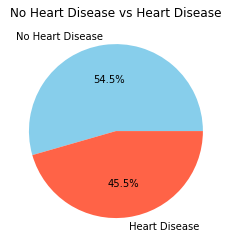

In [ ]:
labels = ["No Heart Disease", "Heart Disease"]

# I count the number of healthy and heart disease cases in the raw data
healthy_count, disease_count = df['output'].value_counts()

values = [healthy_count, disease_count]
plt.pie(values, labels=labels, colors=["skyblue", "tomato"], autopct='%1.1f%%')

plt.title("No Heart Disease vs Heart Disease")
plt.show()


- There is a higher prevalence of the positive class (heart disease present) compared to the negative class (heart disease not present).

In [ ]:
crosstab = pd.crosstab(df['sex'], df['output'])

print(crosstab)


output    0   1
sex            
0        24  72
1       114  93


 ***Which gender will likely to have heart disease than the other?***

Text(0, 0.5, 'Count')

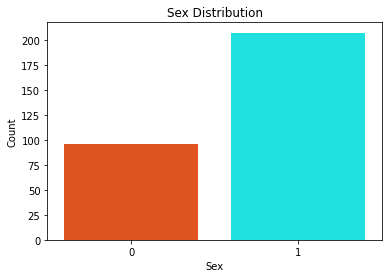

In [ ]:
sns.countplot(data=df, x='sex', palette=['orangered','cyan']);
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

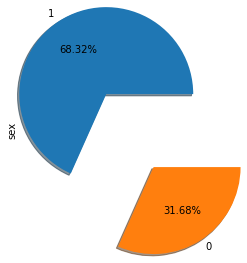

In [ ]:
df['sex'].value_counts().plot.pie(explode=[0.5, 0.5], autopct='%1.2f%%', shadow=True)

# Show the plot
plt.show()

- We can say that the males are more likely to have heart diseases with 68.32% throughout the whole dataset. Meanwhile, females are having less heart diseases (31.68% - about half of that number from males).

In [ ]:
# Calculate the correlation coefficient
correlation_coefficient = df['sex'].corr(df['output'])

print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -0.2809365755017666


***How about the distribution of chest pain type according to male and female separately? This is important as it is the first sign indicating a beginning for many diseases***

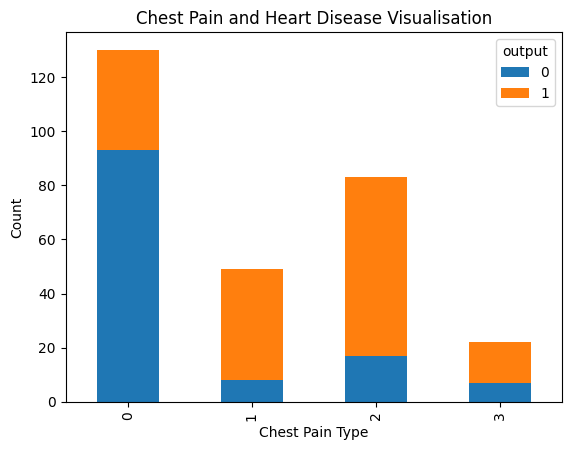

In [ ]:
crosstab = pd.crosstab(df['cp'], df['output'])
crosstab.plot(kind='bar', stacked=True)

plt.title('Chest Pain and Heart Disease Visualisation')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='output')
plt.show()

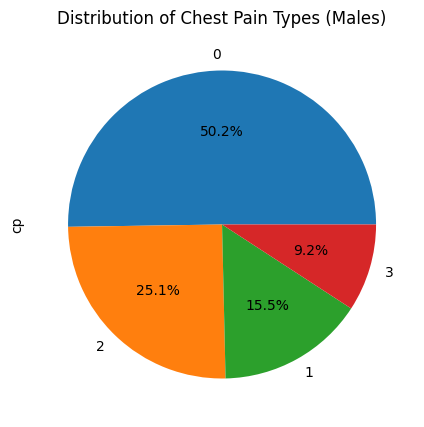

In [ ]:
male_df = df[df['sex'] == 1]
plt.figure(3, figsize=(5,5))
male_df['cp'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Chest Pain Types (Males)")
plt.show()

For male:
+ 50% has type 0 (ASY)
+ 15.5% has type 1(ATA)
+ 25.1% has type 2(NAP)
+ 9.2% has type 3 (TA)

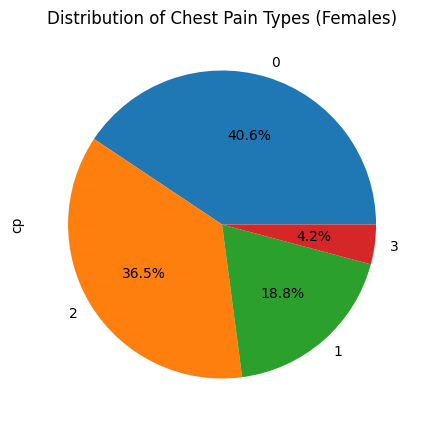

In [ ]:
female_df = df[df['sex'] == 0]
plt.figure(3, figsize=(5,5))
female_df['cp'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Chest Pain Types (Females)")
plt.show()

For female:
+ 40.6% has type 0 (ASY)
+ 18.8% has type 1(ATA)
+ 36.5% has type 2(NAP)
+ 4.2% has type 3 (TA)

***What is the age distribution of people who have heart diseases?***

In [ ]:
age_intervals = [
    {'label': '29-40', 'start': 29, 'end': 40},
    {'label': '41-50', 'start': 41, 'end': 50},
    {'label': '51-60', 'start': 51, 'end': 60},
    {'label': '61-70', 'start': 61, 'end': 70},
    {'label': '71-80', 'start': 71, 'end': 80}
]

# Calculate the percentage of individuals with heart disease in each age interval
for interval in age_intervals:
    age_range = df[(df['age'] >= interval['start']) & (df['age'] <= interval['end'])]
    heart_disease_count = age_range[age_range['output'] == 1].shape[0]
    total_count = age_range.shape[0]
    percentage = (heart_disease_count / total_count) * 100
    print(f"Age {interval['label']}: {percentage:.1f}%")


Age 29-40: 68.4%
Age 41-50: 69.7%
Age 51-60: 49.6%
Age 61-70: 41.1%
Age 71-80: 83.3%


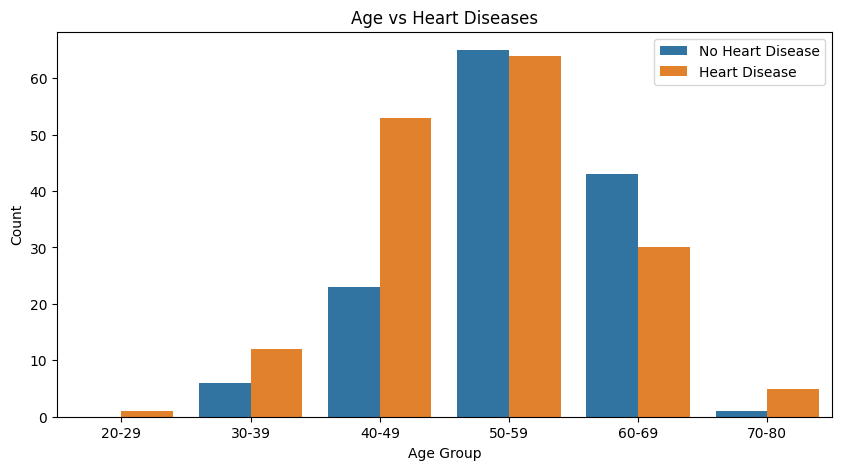

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']

plt.figure(figsize=(10, 5))
sns.countplot(x=pd.cut(df['age'], bins=bins, labels=labels), data=df, hue='output')

# Update legend labels
legend_labels = ['No Heart Disease', 'Heart Disease']
plt.legend(legend_labels)

plt.title('Age vs Heart Diseases')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

In [ ]:
correlation_coefficient = df['age'].corr(df['output'])
print(correlation_coefficient)

-0.22543871587483727


***Examine the distribution of body's indexes.***

In [ ]:
columns_to_groupby = ['fbs', 'exng', 'slp', 'caa', 'thall']

for col in columns_to_groupby:
    heart_disease = df.groupby(col)['output'].mean() * 100
    print(f"{col}:\n{heart_disease}\n")


fbs:
fbs
0    55.038760
1    51.111111
Name: output, dtype: float64

exng:
exng
0    69.607843
1    23.232323
Name: output, dtype: float64

slp:
slp
0    42.857143
1    35.000000
2    75.352113
Name: output, dtype: float64

caa:
caa
0    74.285714
1    32.307692
2    18.421053
3    15.000000
4    80.000000
Name: output, dtype: float64

thall:
thall
0    50.000000
1    33.333333
2    78.313253
3    23.931624
Name: output, dtype: float64



#### **General Visualisation**


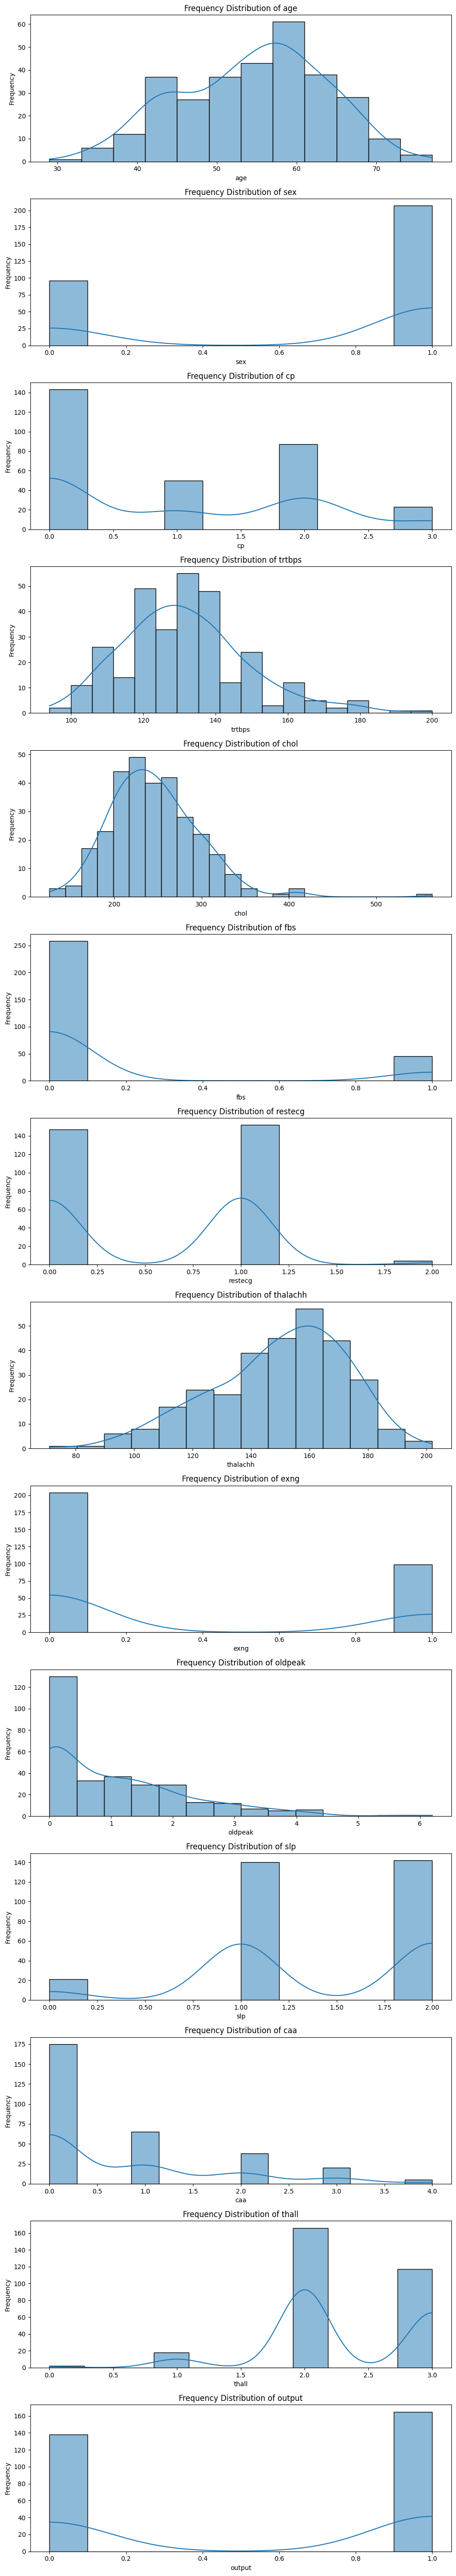

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(10, 4 * len(df.columns)))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import scipy.stats as stats
correlation, p_value = stats.pearsonr(df['trtbps'], df['output'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: -0.14493112849775155
P-value: 0.011546059200233367


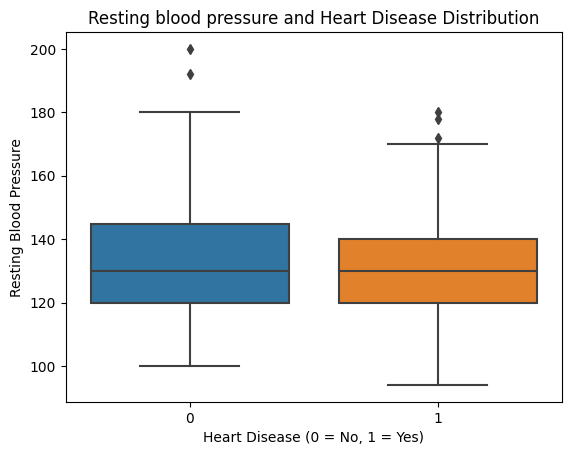

In [ ]:
sns.boxplot(x='output', y='trtbps', data=df)

plt.title('Resting blood pressure and Heart Disease Distribution')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting Blood Pressure")
plt.show()

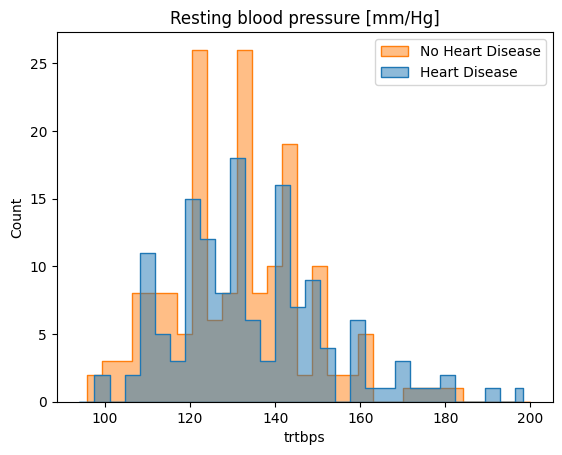

In [ ]:
sns.histplot(data=df, x='trtbps', bins=30, hue='output', multiple='dodge', element='step', alpha=0.5)
plt.title('Resting blood pressure [mm/Hg]')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

In [ ]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

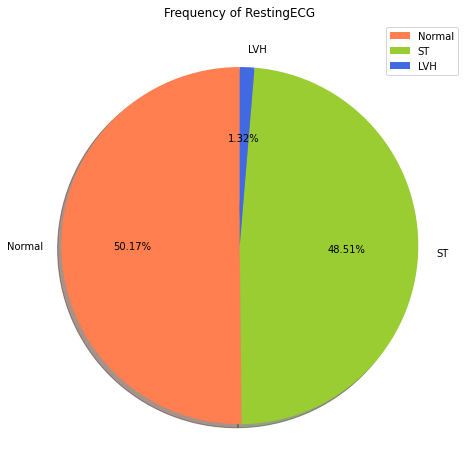

In [ ]:
plt.figure(figsize=(8,9))
plt.pie([152, 147, 4] , explode=(0,0,0) , labels=['Normal', 'ST', 'LVH'] ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['coral', 'yellowgreen', 'royalblue'])
plt.title("Frequency of RestingECG")
plt.legend()

In [ ]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

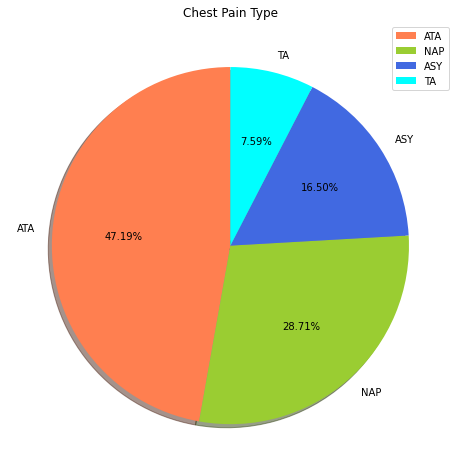

In [ ]:
plt.figure(figsize=(8,9))
plt.pie([143, 87, 50, 23] , explode=(0,0,0,0) , labels=['ATA', 'NAP', 'ASY', 'TA'] ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['coral', 'yellowgreen', 'royalblue', 'cyan'])
plt.title("Chest Pain Type")
plt.legend()

In [ ]:
df['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

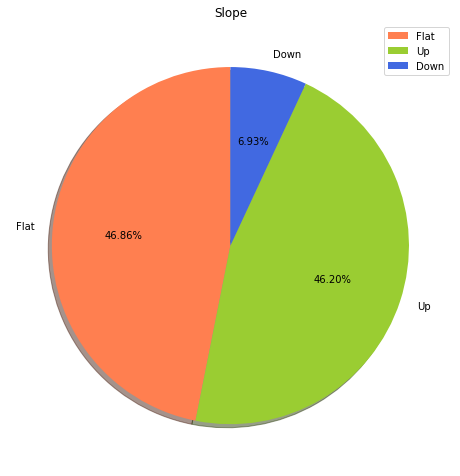

In [ ]:
plt.figure(figsize=(8,9))
plt.pie([142,140,21] , explode=(0,0,0) , labels=['Flat','Up','Down'] ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['coral', 'yellowgreen', 'royalblue'])
plt.title("Slope")
plt.legend()

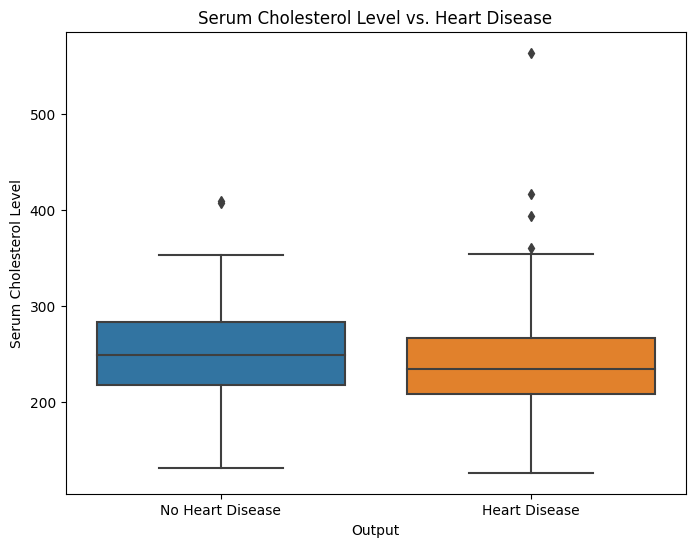

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='output', y='chol', data=df)

plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Output')
plt.ylabel('Serum Cholesterol Level')
plt.title('Serum Cholesterol Level vs. Heart Disease')

plt.show()

In [ ]:
from scipy import stats

In [ ]:
chol_with_heart_disease = df[df['output'] == 1]['chol']
chol_without_heart_disease = df[df['output'] == 0]['chol']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(chol_with_heart_disease, chol_without_heart_disease)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -1.4842450762526977
P-Value: 0.13879032695600638


***What about the correlation of the features?***


In [ ]:
correlation_with_output = df.corr()['output'].sort_values(ascending=False)

correlation_with_output

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

<Axes: >

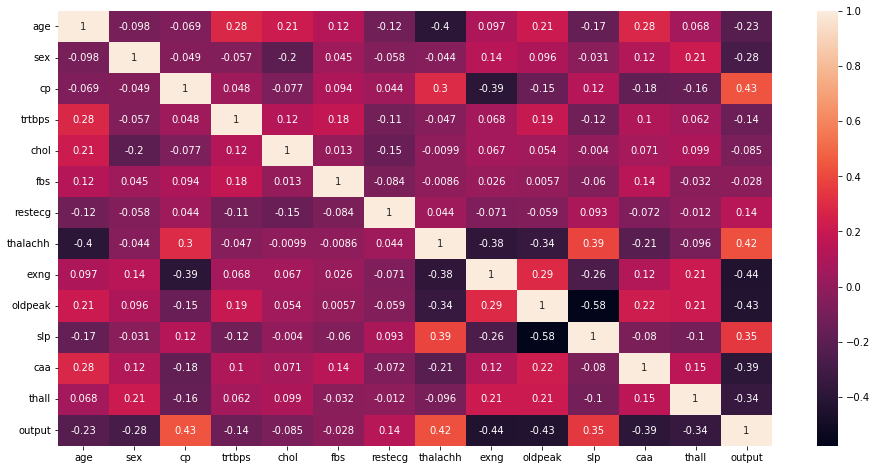

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

## **Conclusion:**
- People with Type 1 and 2 of Chest Pain are more likely to have CVD.
- CVDs are present in the younger age group (20 to 40) and increase in the age group of 41-50, but the number decrease for those who are from 51 to 70 years old.
- No robust correlation is seen between fbs and heart disease.
- The absence of exng can be considered as a vital clue towards heart disease.
- People who have type 2 of 'slp' are likely to have CVD.
- 78.3% of individuals with thall = 2 are diagnosed with HD.
- A weak correlation between resting blood pressure and CVD can be obtained from low p-value.
- The cholesterol level between 2 groups of people in the dataset is quite the same.

# Data Processing

### ***Let's check the outliers***

Further analysis on attributes with outliers (the ones having a few dots appearing near the boxplot)



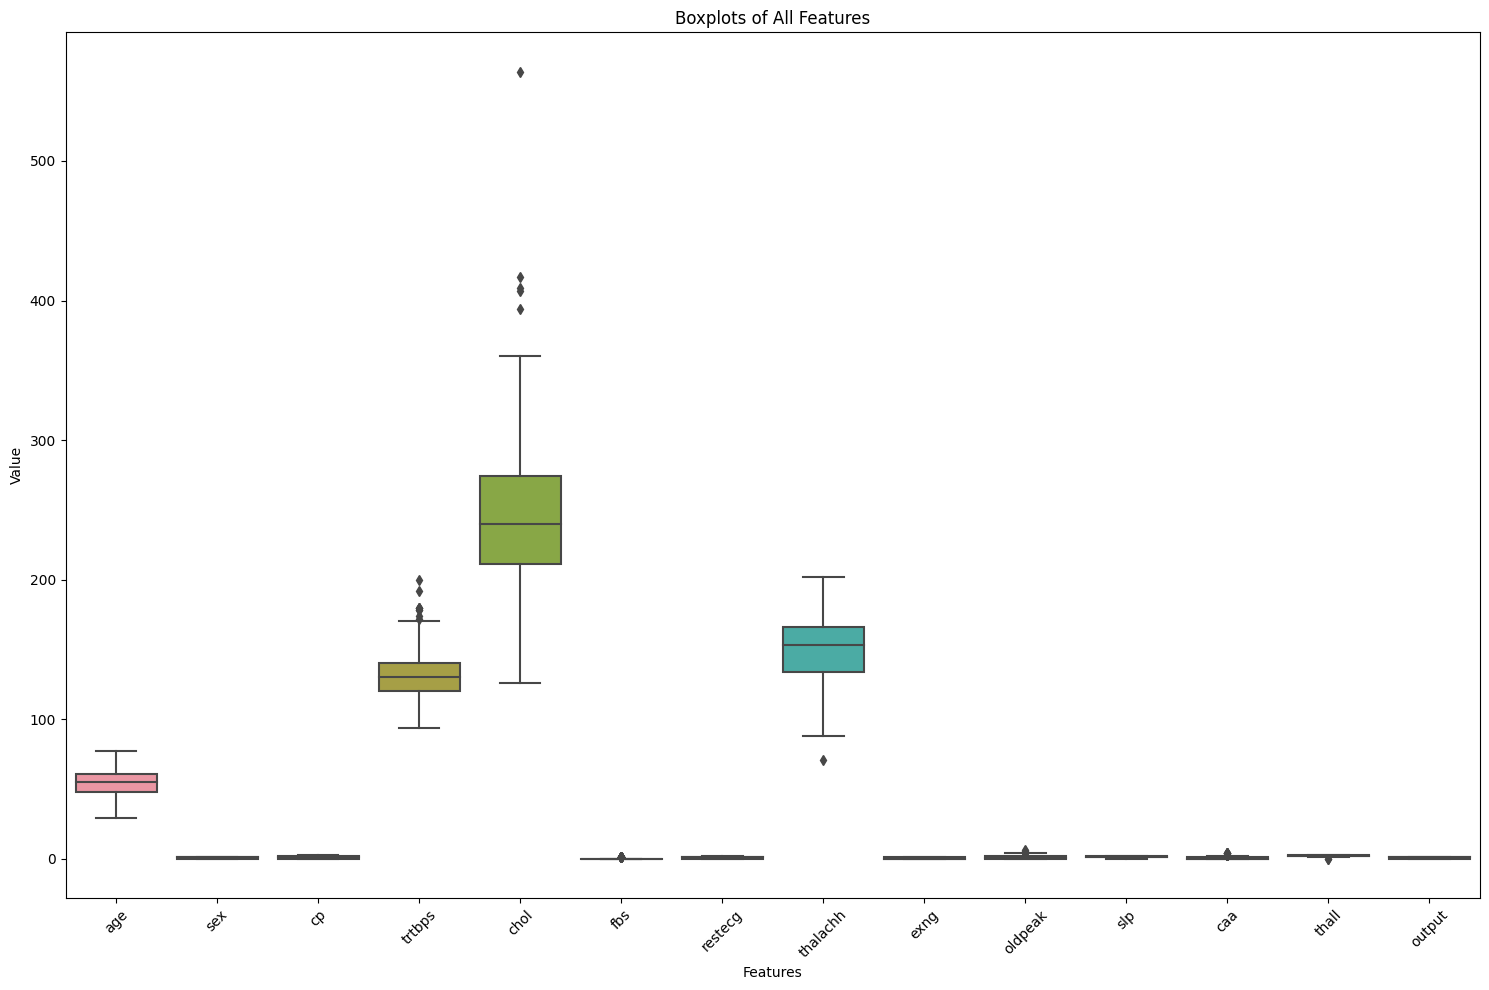

In [ ]:
plt.figure(figsize=(15, 10))

# Create a boxplot for all columns
sns.boxplot(data=df)

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.title('Boxplots of All Features')
plt.ylabel('Value')
plt.xlabel('Features')

plt.tight_layout()
plt.show()

In [ ]:
def find_outliers_IQR(df, feature):
    q1, q3 = df[feature].quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [ ]:
# List of continuous variables
continuous_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for col in continuous_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Reset index after removing outliers
df.reset_index(drop=True, inplace=True)


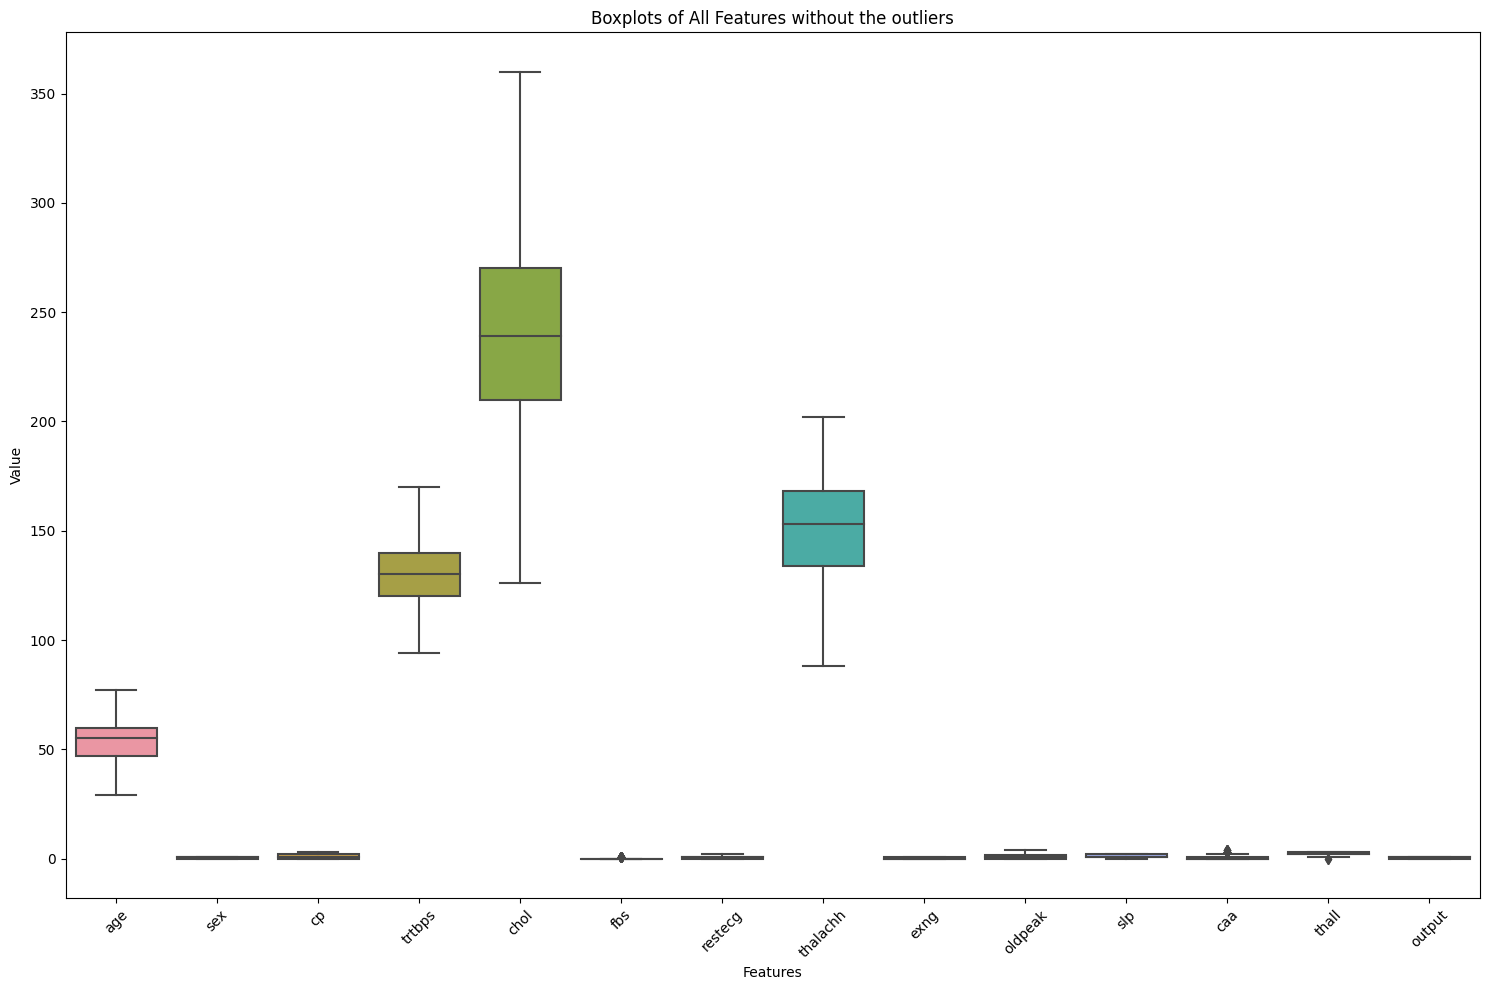

In [ ]:
plt.figure(figsize=(15, 10))

# Create a boxplot for all columns
sns.boxplot(data=df)

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.title('Boxplots of All Features without the outliers')
plt.ylabel('Value')
plt.xlabel('Features')

plt.tight_layout()
plt.show()

In [ ]:
for feature in continuous_vars:
    outs = find_outliers_IQR(df, feature)
    print(f"For {feature}, number of outliers: {len(outs)}")
    print(f"Max outlier value: {outs[feature].max()}")
    print(f"Min outlier value: {outs[feature].min()}\n")

    # Drop the outliers from the original DataFrame
    df = df.drop(outs.index)
categorical_outliers = ['cp', 'restecg', 'slp', 'caa', 'thall']
for feature in categorical_outliers:
    print(f"For {feature}, unique values: {df[feature].unique()}")

For age, number of outliers: 0
Max outlier value: nan
Min outlier value: nan

For trtbps, number of outliers: 0
Max outlier value: nan
Min outlier value: nan

For chol, number of outliers: 0
Max outlier value: nan
Min outlier value: nan

For thalachh, number of outliers: 0
Max outlier value: nan
Min outlier value: nan

For oldpeak, number of outliers: 0
Max outlier value: nan
Min outlier value: nan

For cp, unique values: [3 2 1 0]
For restecg, unique values: [0 1 2]
For slp, unique values: [0 2 1]
For caa, unique values: [0 2 1 3 4]
For thall, unique values: [1 2 3 0]


### ***Feature selection and Standardisation***

In [ ]:
## Split training and testing split
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
##Test X
X.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
## Split the data with 80% of training and 20% of testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_scaler.fit(X_train)

# standardise the numerical attributes in the training and testing sets
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Create new DataFrames with standardised numerical attributes
#X_train = pd.DataFrame(X_train_std, columns=X.columns)
#X_test = pd.DataFrame(X_test_std, columns=X.columns)


In [ ]:
X_train_std

array([[ 1.10021754,  0.62660836, -0.94544299, ..., -2.43303626,
         0.2621045 , -0.56202319],
       [ 0.33845472, -1.59589317, -0.94544299, ..., -0.74919714,
        -0.71326797,  1.11665134],
       [ 0.88257102,  0.62660836,  0.02129376, ..., -0.74919714,
         0.2621045 ,  1.11665134],
       ...,
       [-1.40271744,  0.62660836,  0.02129376, ...,  0.93464198,
        -0.71326797, -0.56202319],
       [ 0.6649245 , -1.59589317,  0.98803051, ...,  0.93464198,
         0.2621045 , -0.56202319],
       [ 1.75315711,  0.62660836,  0.02129376, ...,  0.93464198,
        -0.71326797, -0.56202319]])

In [ ]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
X_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3


# Applying Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
precisions={}
recalls={}
f1_scores={}
accuracy = {}
AUC = {}

In [ ]:

from sklearn.model_selection import cross_val_score

Finding estimator value for Random Forest Model

In [ ]:
# Define a list of different numbers of estimators to try
estimator_values = [50, 100, 150, 200, 250]

# Perform cross-validation for each number of estimators
for estimators in estimator_values:
    # Initialise the Random Forest classifier with the current number of estimators
    model = RandomForestClassifier(n_estimators=estimators)

    # Here is the cross-validation performance
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # I'll Print the average accuracy across all folds for the current number of estimators
    print("Number of estimators: %d, Average Accuracy: %.4f" % (estimators, scores.mean()))

Number of estimators: 50, Average Accuracy: 0.8283
Number of estimators: 100, Average Accuracy: 0.8115
Number of estimators: 150, Average Accuracy: 0.8150
Number of estimators: 200, Average Accuracy: 0.8117
Number of estimators: 250, Average Accuracy: 0.8281


## KNN parameters selection

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X_train_std, y_train, cv=10)

print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.84       0.6        0.79166667 0.875      0.875      0.75
 0.875      0.91666667 0.91666667 0.75      ]


It appears that the model's performance varies across the folds, ranging from 60% to 91.67% accuracy.

## XGBoost parameters selection

In [ ]:
from xgboost import XGBClassifier

The optimal number of estimators for XGBoost can vary depending on the specific dataset, so for now I am not sure what estimators i should put in. I will use early stopping in this case, which is a technique that allows the model to automatically determine the optimal number of trees during training by monitoring the performance on a validation set.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)


Best parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

estimator_values = [50, 100, 150, 200, 250]

avg_accuracy_scores = []

# Perform cross-validation
for n_estimators in estimator_values:
    ada = AdaBoostClassifier(n_estimators=n_estimators)
    scores = cross_val_score(ada, X, y, cv=10)
    avg_accuracy = np.mean(scores)
    avg_accuracy_scores.append(avg_accuracy)
    print("Number of estimators: {}, Average Accuracy: {:.4f}".format(n_estimators, avg_accuracy))



Number of estimators: 50, Average Accuracy: 0.8113
Number of estimators: 100, Average Accuracy: 0.7881
Number of estimators: 150, Average Accuracy: 0.7782
Number of estimators: 200, Average Accuracy: 0.7814
Number of estimators: 250, Average Accuracy: 0.7716


In [ ]:
# Find the index of the maximum average accuracy score
best_index = np.argmax(avg_accuracy_scores)
best_n_estimators = estimator_values[best_index]
print("Best number of estimators: {}".format(best_n_estimators))

Best number of estimators: 50


Based on the cross-validation results, it appears that the best number of estimators for AdaBoost on the heart dataset is 50. The average accuracy achieved with 50 estimators is 0.8113.

Accuracy of Naive Bayes: 0.79%
Precision of Naive Bayes: 0.78
Recall of Naive Bayes: 0.88
F1-score of Naive Bayes: 0.82


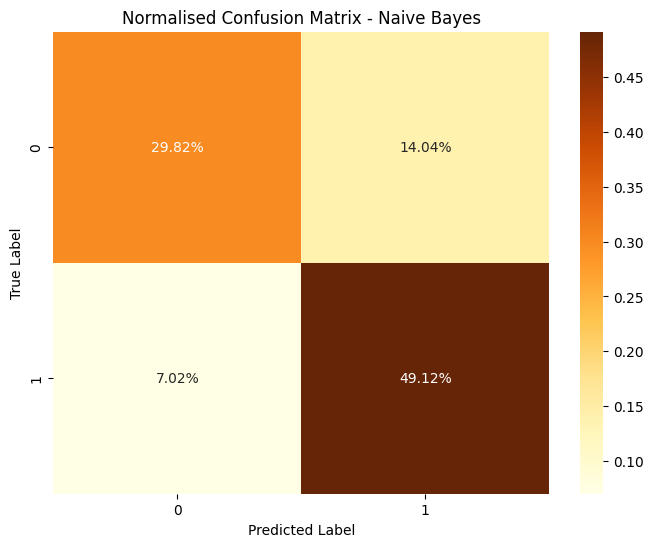

Confusion Matrix for Naive Bayes:
-------------------------------
[[17  8]
 [ 4 28]]
-------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


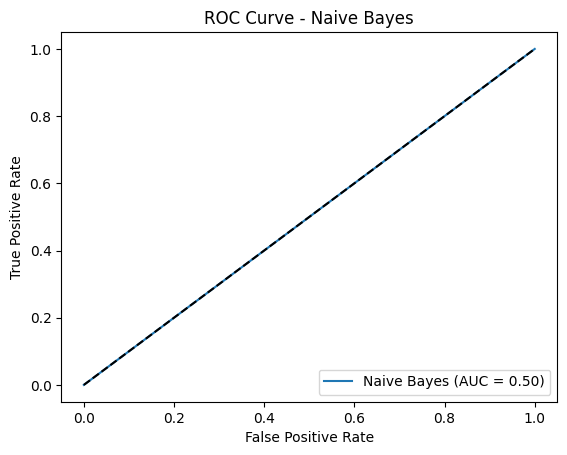

Accuracy of Logistic Regression: 0.84%
Precision of Logistic Regression: 0.79
Recall of Logistic Regression: 0.97
F1-score of Logistic Regression: 0.87


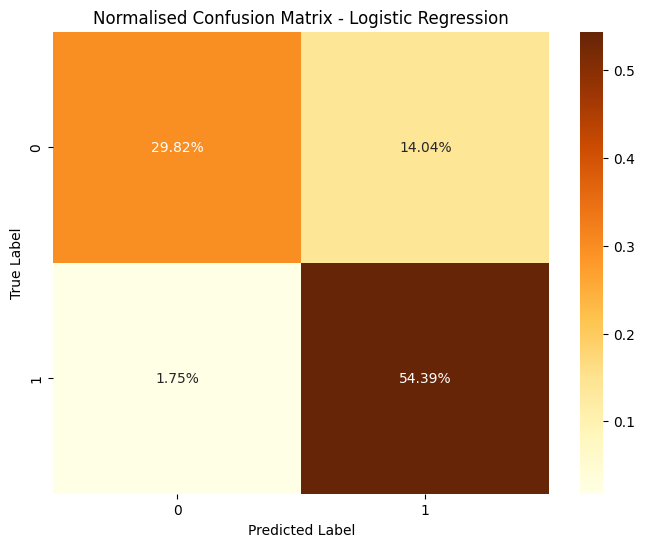

Confusion Matrix for Logistic Regression:
-------------------------------
[[17  8]
 [ 1 31]]
-------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


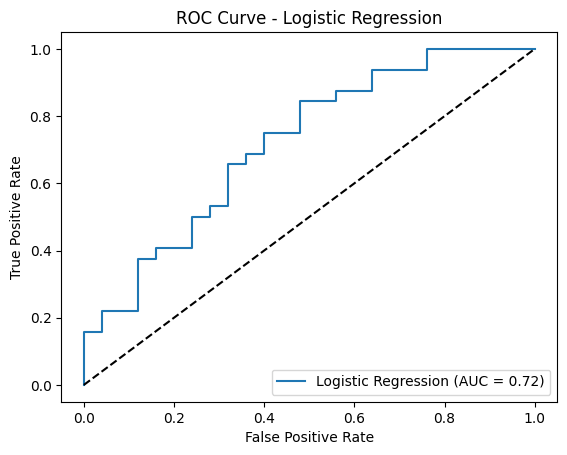

Accuracy of Decision Tree: 0.86%
Precision of Decision Tree: 0.85
Recall of Decision Tree: 0.91
F1-score of Decision Tree: 0.88


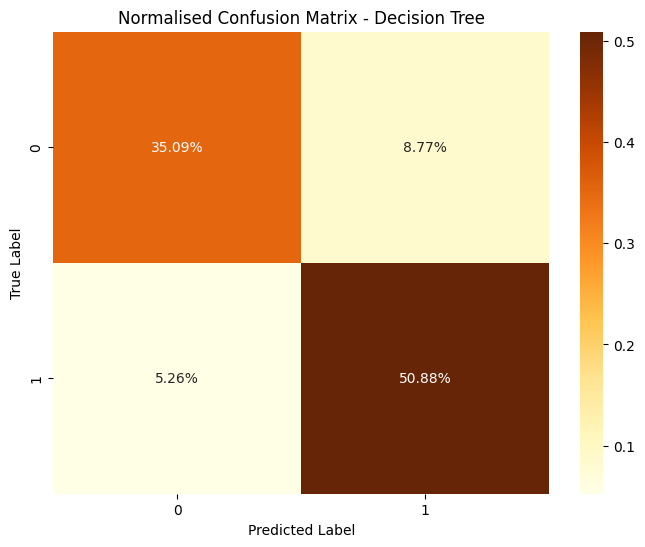

Confusion Matrix for Decision Tree:
-------------------------------
[[20  5]
 [ 3 29]]
-------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


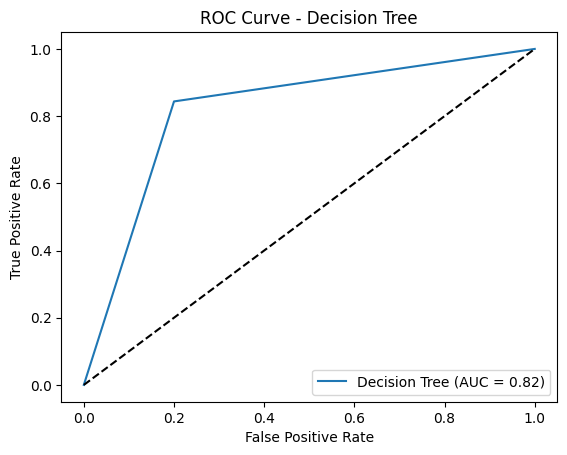

Accuracy of Random Forest: 0.86%
Precision of Random Forest: 0.80
Recall of Random Forest: 1.00
F1-score of Random Forest: 0.89


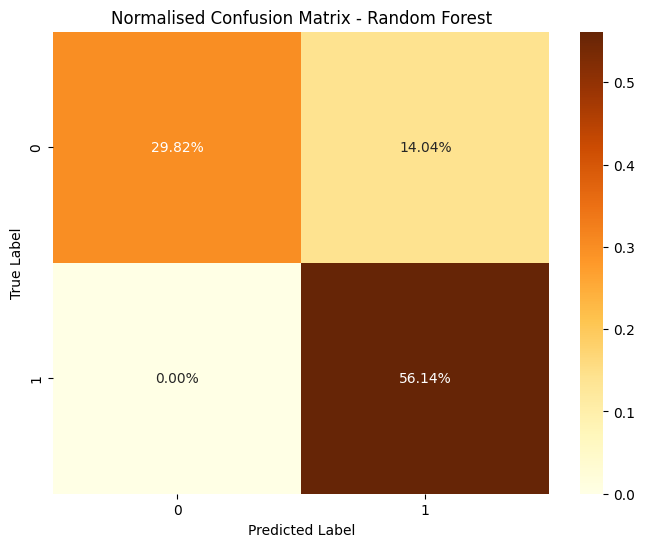

Confusion Matrix for Random Forest:
-------------------------------
[[17  8]
 [ 0 32]]
-------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


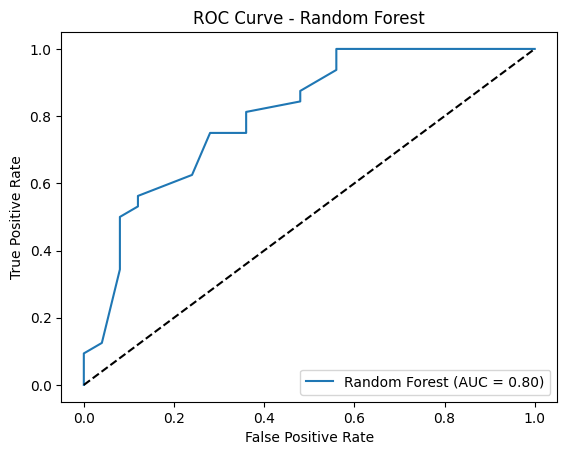

Accuracy of KNN: 0.81%
Precision of KNN: 0.80
Recall of KNN: 0.88
F1-score of KNN: 0.84


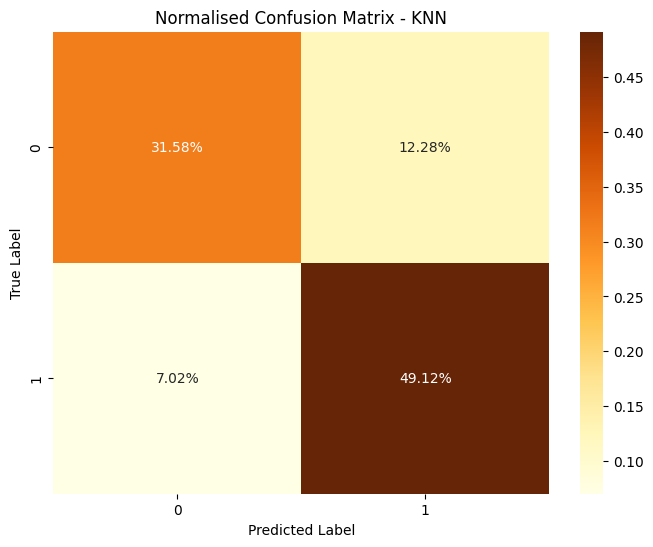

Confusion Matrix for KNN:
-------------------------------
[[18  7]
 [ 4 28]]
-------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


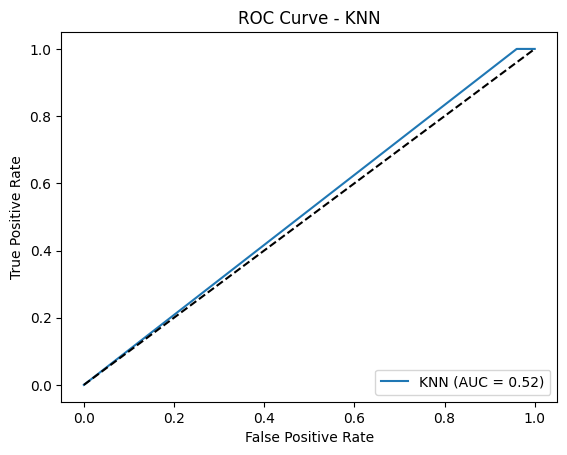

Accuracy of XGBoost: 0.84%
Precision of XGBoost: 0.78
Recall of XGBoost: 1.00
F1-score of XGBoost: 0.88


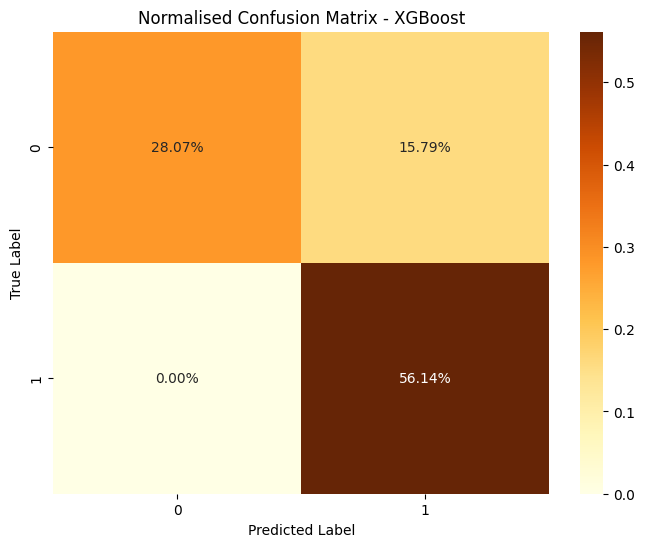

Confusion Matrix for XGBoost:
-------------------------------
[[16  9]
 [ 0 32]]
-------------------------------



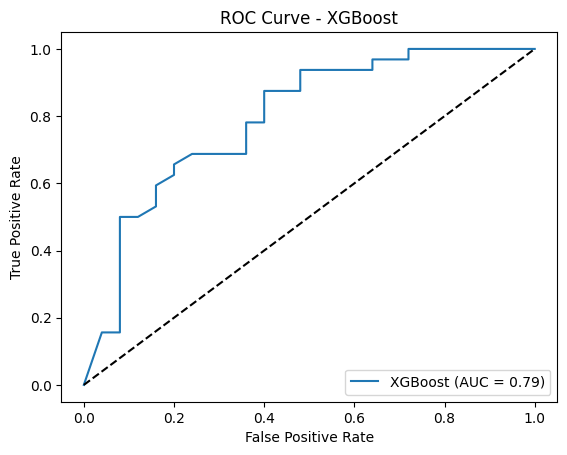

Accuracy of AdaBoost: 0.88%
Precision of AdaBoost: 0.84
Recall of AdaBoost: 0.97
F1-score of AdaBoost: 0.90


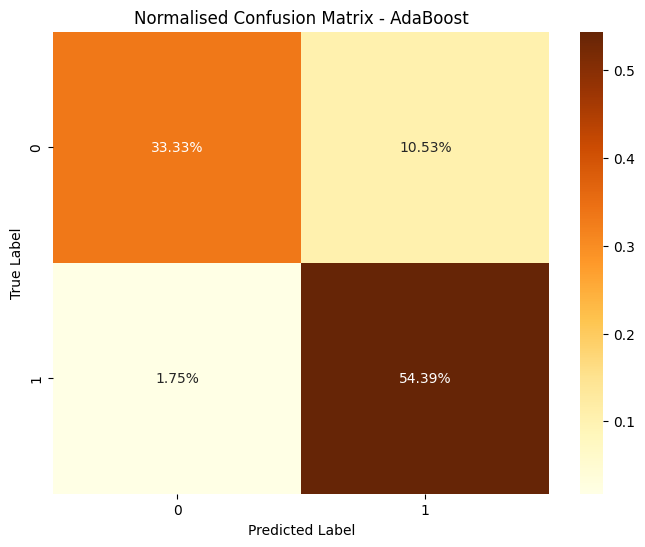

Confusion Matrix for AdaBoost:
-------------------------------
[[19  6]
 [ 1 31]]
-------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


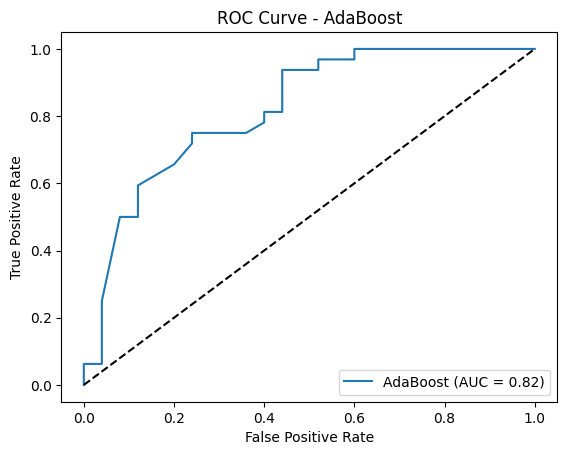

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def evaluate_model(model, model_name, X_train_std, y_train, X_test_std, y_test):
    # Train the model
    model.fit(X_train_std, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_std)

    # Calculate and store metrics
    acc = accuracy_score(y_test, y_pred) * 100
    accuracy[model_name] = acc
    recalls[model_name] = recall_score(y_test, y_pred)
    precisions[model_name] = precision_score(y_test, y_pred)
    f1_scores[model_name] = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy of {model_name}: {acc:.2f}%")
    print(f"Precision of {model_name}: {precisions[model_name]:.2f}")
    print(f"Recall of {model_name}: {recalls[model_name]:.2f}")
    print(f"F1-score of {model_name}: {f1_scores[model_name]:.2f}")

    # Plot normalised confusion matrix
    cf_mat = confusion_matrix(y_test, y_pred)
    normalized_cf_matrix = cf_mat / np.sum(cf_mat)
    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_cf_matrix, annot=True, fmt='.2%', cmap='YlOrBr')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Normalised Confusion Matrix - {model_name}')
    plt.show()

    #Print out confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print("-------------------------------")
    print(cf_mat)
    print("-------------------------------\n")

    # Plot ROC curve
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    AUC[model_name] = auc
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'XGBoost': XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, subsample=0.7, colsample_bytree=0.5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50)
}

# Evaluate each model
for name, model in models.items():
    evaluate_model(model, name, X_train_std, y_train, X_test_std, y_test)


# ***Comparing models***

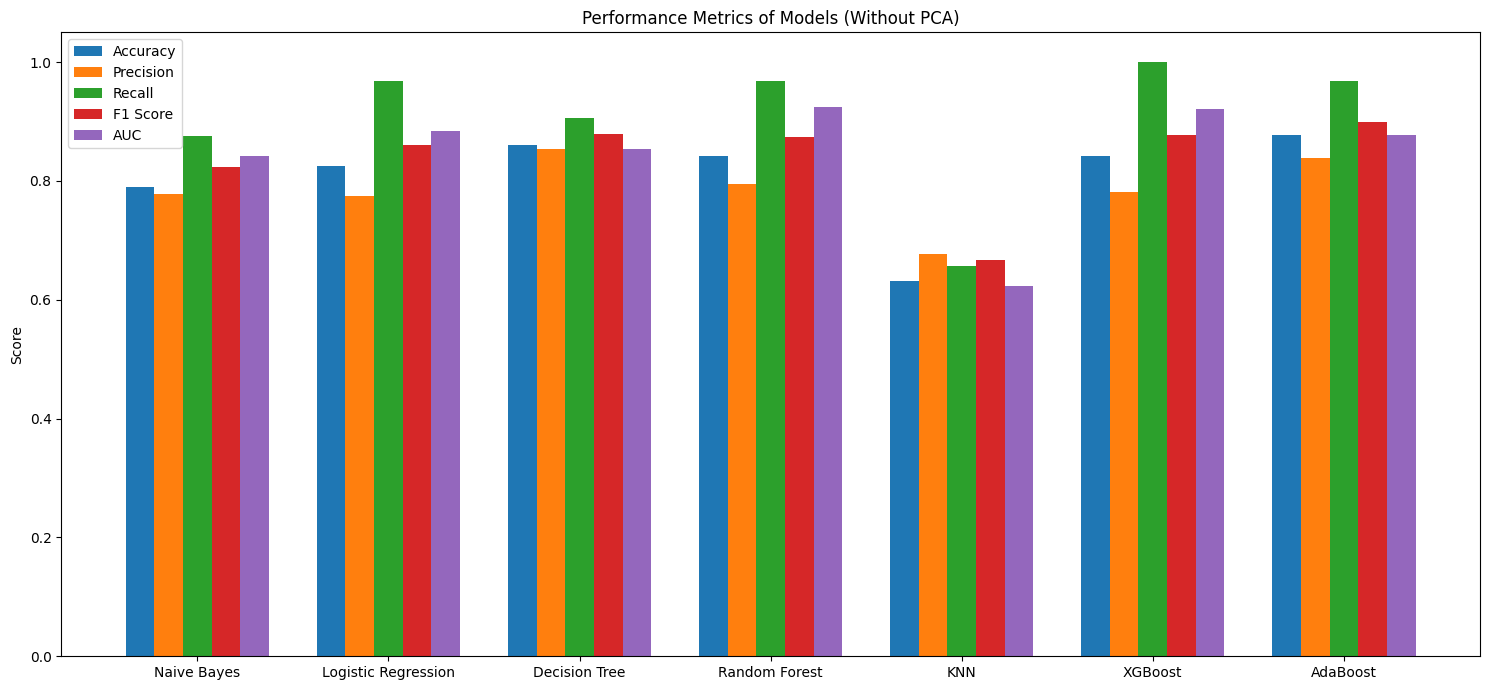

In [ ]:
import matplotlib.pyplot as plt

models = list(accuracy.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
values = [list(accuracy.values()), list(precisions.values()), list(recalls.values()), list(f1_scores.values()), list(AUC.values())]

fig, ax = plt.subplots(figsize=(15, 7))

# Plotting each metric
for i, metric in enumerate(metrics):
    ax.bar([x + i*0.15 for x in range(len(models))], values[i], width=0.15, label=metric)

ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Models (Without PCA)')
ax.set_xticks([x + 0.3 for x in range(len(models))])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
accuracy

{'Naive Bayes': 0.7894736842105263,
 'Logistic Regression': 0.8245614035087719,
 'Decision Tree': 0.8596491228070176,
 'Random Forest': 0.8421052631578947,
 'KNN': 0.631578947368421,
 'XGBoost': 0.8421052631578947,
 'AdaBoost': 0.8771929824561403}

In [ ]:
recalls

{'Naive Bayes': 0.875,
 'Logistic Regression': 0.96875,
 'Decision Tree': 0.90625,
 'Random Forest': 0.96875,
 'KNN': 0.65625,
 'XGBoost': 1.0,
 'AdaBoost': 0.96875}

In [ ]:
precisions

{'Naive Bayes': 0.7777777777777778,
 'Logistic Regression': 0.775,
 'Decision Tree': 0.8529411764705882,
 'Random Forest': 0.7948717948717948,
 'KNN': 0.6774193548387096,
 'XGBoost': 0.7804878048780488,
 'AdaBoost': 0.8378378378378378}

In [ ]:
f1_scores

{'Naive Bayes': 0.823529411764706,
 'Logistic Regression': 0.8611111111111113,
 'Decision Tree': 0.8787878787878787,
 'Random Forest': 0.8732394366197183,
 'KNN': 0.6666666666666667,
 'XGBoost': 0.8767123287671234,
 'AdaBoost': 0.8985507246376812}

In [ ]:
AUC

{'Naive Bayes': 0.8425,
 'Logistic Regression': 0.88375,
 'Decision Tree': 0.8531250000000001,
 'Random Forest': 0.9237500000000001,
 'KNN': 0.6231249999999999,
 'XGBoost': 0.9212499999999999,
 'AdaBoost': 0.8775}

In [ ]:
data = {'accuracy': accuracy, 'recalls': recalls, 'precisions': precisions, 'f1_scores': f1_scores, 'AUC': AUC}

model = pd.DataFrame(data, index=['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost', 'AdaBoost'])
model

,accuracy,recalls,precisions,f1_scores,AUC
Naive Bayes,78.947368,0.87500,0.777778,0.823529,0.842500
Logistic Regression,82.456140,0.96875,0.775000,0.861111,0.883750
Decision Tree,85.964912,0.90625,0.852941,0.878788,0.853125
Random Forest,87.719298,1.00000,0.820513,0.901408,0.923750
KNN,63.157895,0.65625,0.677419,0.666667,0.623125
XGBoost,84.210526,1.00000,0.780488,0.876712,0.921250
AdaBoost,87.719298,0.96875,0.837838,0.898551,0.877500


## Creating barplots for all the metrics

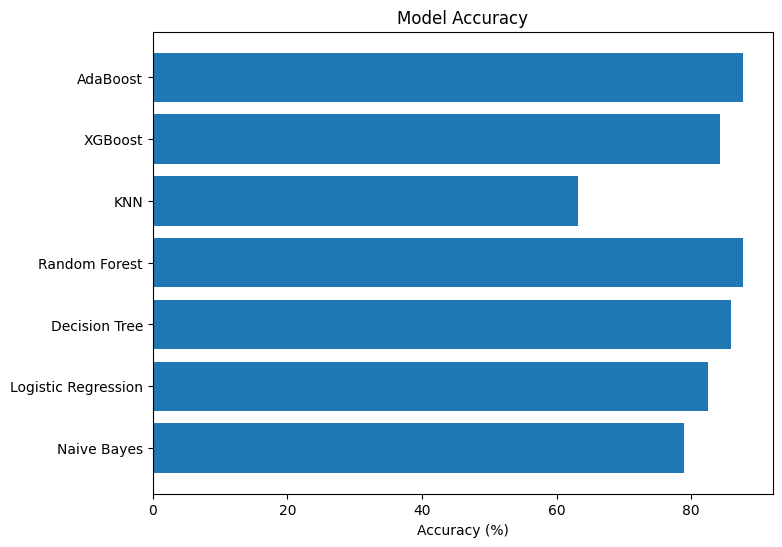

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(accuracy.keys()), list(accuracy.values()))
ax.set_xlabel('Accuracy (%)')
ax.set_title('Model Accuracy')
plt.show()

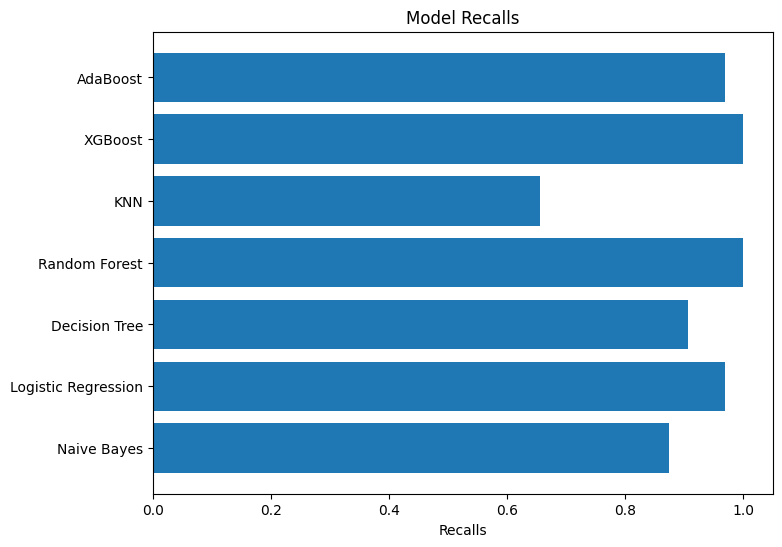

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(recalls.keys()), list(recalls.values()))
ax.set_xlabel('Recalls')
ax.set_title('Model Recalls')
plt.show()

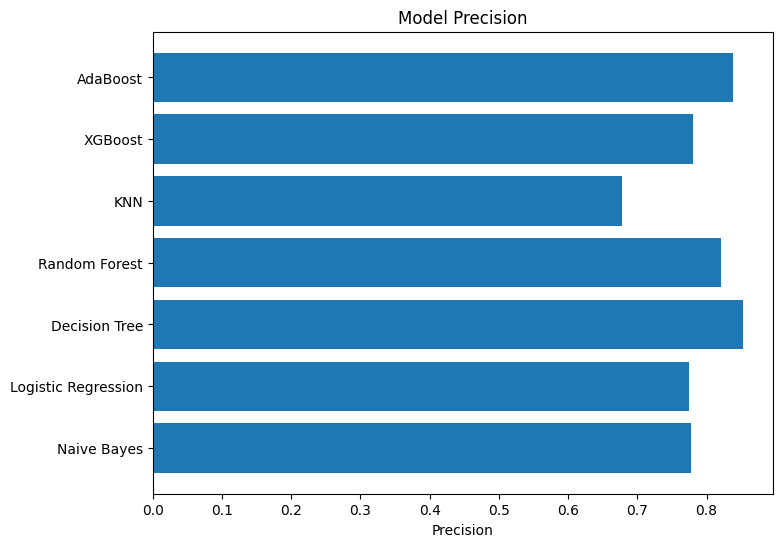

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(precisions.keys()), list(precisions.values()))
ax.set_xlabel('Precision')
ax.set_title('Model Precision')
plt.show()

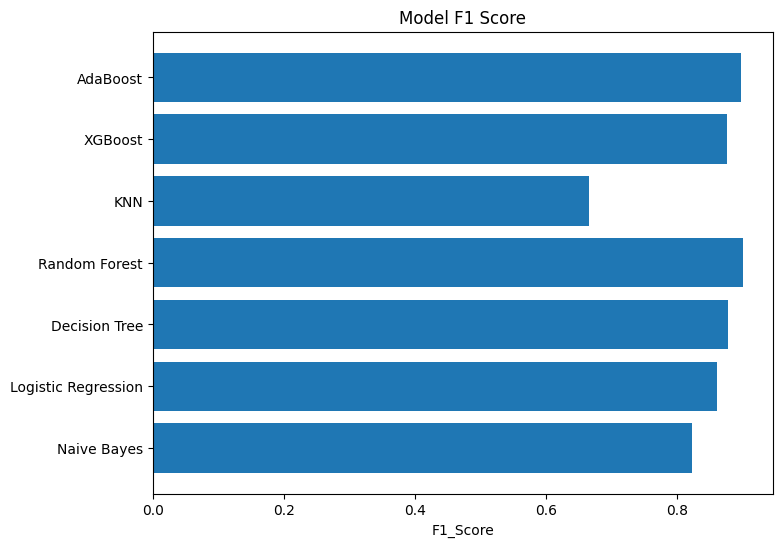

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(f1_scores.keys()), list(f1_scores.values()))
ax.set_xlabel('F1_Score')
ax.set_title('Model F1 Score')
plt.show()

# Conclusion:
* We see that 4 models 'Naive Bayes', 'Logistic Regression', 'XGBoost', and 'Random Forest' performing pretty effectively in this dataset. Further analysis will be conducted in the report.

# Prepare a predictive system for the app


In [ ]:
## Let's copy an observation from the heart.csv file as an input
input_data = (52,1,2,172,199,1,1,162,0,0.5,2,0,3)

# Convert them into numpy array so it's more convenient for the model
convert_input = np.asarray(input_data)

# Convert it into pandas dataframe and provide feature names
df_input = pd.DataFrame([convert_input], columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'])

As we predict for the final instance (1 or 0), I will reshape the converted array to (1, -1) which means we have 1 row, and the -1 in the reshape function is a placeholder that allows NumPy to automatically infer the appropriate number of columns based on the size of the input data and the desired shape. So basically, we will have 1 row and 13 columns as the data set size.

In [ ]:
# Make the prediction
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train_std, y_train)

# Scale the input data
scaled_input = std_scaler.transform(df_input)
prediction = rf.predict(scaled_input)

if prediction[0] == 0:
    print('You do not have heart disease.')
else:
    print('You have early signs of heart disease.')

You have early signs of heart disease.


# Save The Model

In [ ]:
from joblib import dump, load

# Save model to disk
dump(rf, 'heart_pred_model.joblib')
dump(std_scaler, 'std_scaler.joblib')

# Load the model from disk
loaded_model = load('heart_pred_model.joblib')
loaded_scaler = load('std_scaler.joblib')

In [ ]:
## Let's try again with the input from the dataset
input_data = (60,0,2,102,318,0,1,160,0,0,2,1,2)

# Convert them into numpy array so it's more convenient for the model
convert_input = np.asarray(input_data)

# Convert it into pandas dataframe and provide feature names
df_input = pd.DataFrame([convert_input], columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'])

# Scale the input data
scaled_input = loaded_scaler.transform(df_input)

# Make the prediction
prediction = loaded_model.predict(scaled_input)

if prediction[0] == 0:
    print('You do not have heart disease.')
else:
    print('You have early signs of heart disease.')

You have early signs of heart disease.


In [ ]:
import xgboost as xgb
print(xgb.__version__)

import joblib
print(joblib.__version__)

import sklearn
print(sklearn.__version__)

1.7.6
1.3.2
1.2.2
